# Decision Tree & Random Forest

We will use Titanic data set to learn the Decision tree and after that we will learn Random Forest.
https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
## Add these lines to turn off the warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
## import data
train_df = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Titanic/titanic_train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Titanic/titanic_test.csv")

In [3]:
df_all = pd.concat([train_df, test_df], sort=True).reset_index(drop=True)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Data Cleaning

In [9]:
## We will do Data Cleaning in complete dataset and after that split the data in Train and test
## find missing values in complete dataset
print(test_df.isnull().sum())
## find only null value columns
null_columns=df_all.columns[df_all.isnull().any()]
print(null_columns)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')


In [10]:
## There are 3 variables which have missing values,
df_all["Embarked"].unique()
## Port of Embarkation :  C = Cherbourg, Q = Queenstown, S = Southampton


array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
print(df_all.Embarked.value_counts())
## lets print the percentage of unique value so that we can fill the null vlaue
print("Total count of Embarked : ", len(df_all["Embarked"]))
print("Below are the count Percentage of Embarked values:\n",(df_all.Embarked.value_counts()/len(df_all["Embarked"]) * 100))

S    914
C    270
Q    123
Name: Embarked, dtype: int64
Total count of Embarked :  1309
Below are the count Percentage of Embarked values:
 S    69.824293
C    20.626432
Q     9.396486
Name: Embarked, dtype: float64


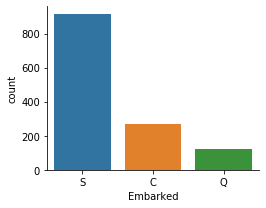

In [12]:
## Display the above values in graph
sns.catplot(x= "Embarked", data= df_all,kind = "count",aspect= 1.2, height= 3)

In [13]:
## Embarked -- 72 % values are belong to "S",
##print(df_all[df_all["Embarked"].isnull()][null_columns])
print(df_all[df_all["Embarked"].isnull()])

      Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket  
61       0           62       1  female      0       1.0  113572  
829      0          830       1  female      0       1.0  113572  


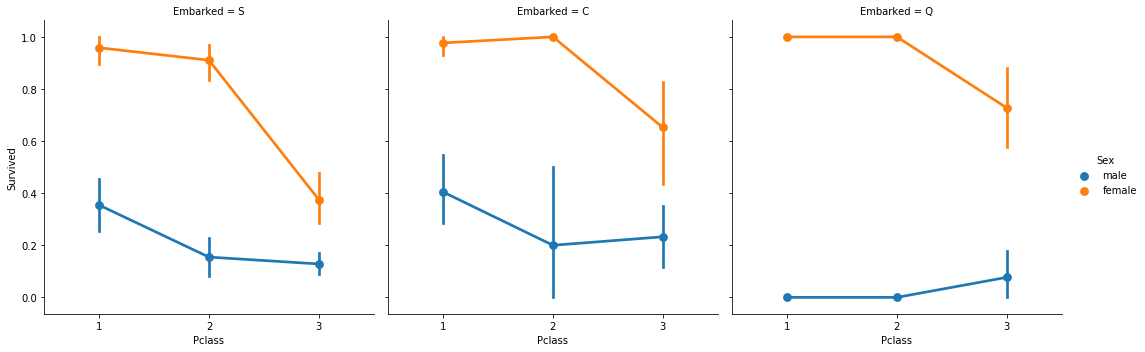

In [14]:
sns.catplot(x='Pclass',col='Embarked',y='Survived',hue='Sex',data=df_all,kind='point')

In [15]:
## Import all the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import impute
from sklearn import tree

From the above graph we can observe that when we have embarked = S then we have Female survival mostly also those belong to Pclass =1 
Now If we see the null data from Embarked these also follow the same like both null value are Female and have Pclss = 1
so we can replace these value with "S"

In [16]:
## Replace embarked null vlaue with "S"
df_all.Embarked.fillna("S",inplace= True)

In [17]:
df_all.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

There are more than 75% null value in Cabin and if we replace the null value then we
have to do lots of feature engineering so fow now I am dropping the Cabin column. You can refer Kaggle EDA to learn deep regarding dealimg with misisng values

In [18]:
df_all.drop("Cabin", inplace = True, axis = 1)

In [19]:
df_all.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

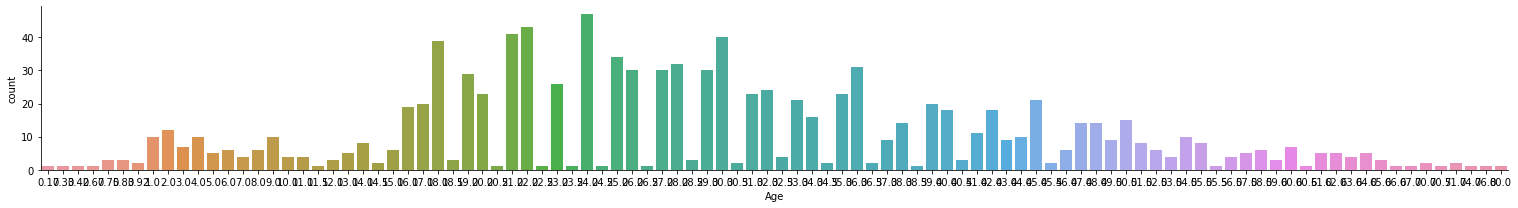

In [20]:
## Now Replace missing value in Age column
## Lets plot age colun
sns.catplot(x= "Age", kind= "count", data= df_all, aspect= 7, height= 3)

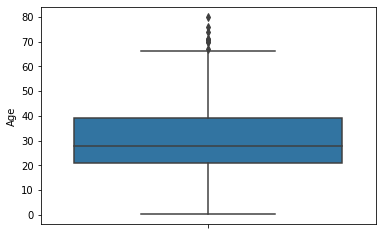

In [21]:
sns.boxplot(y= "Age", data= df_all)

from the above both graph we can analyse that there are some outliers in Age columns Age above than 62 to 65

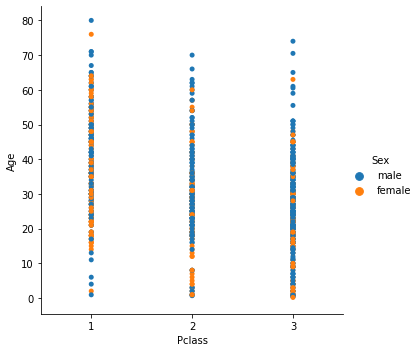

In [22]:
## Now Replace missing value in Age column
## Lets compare the Age and Pclass with SEX
sns.catplot(y = "Age", x= "Pclass", hue= "Sex", data= df_all,jitter=False)

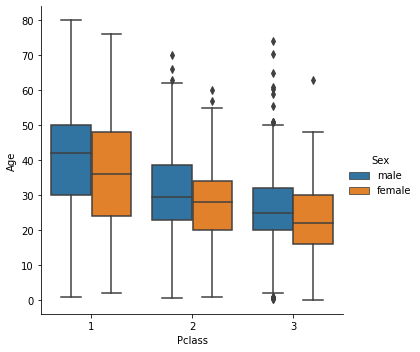

In [23]:
sns.catplot(y = "Age", x= "Pclass",hue="Sex", data= df_all, kind = "box")

In [24]:
df_all.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


Median age of Pclass groups is the best choice because of its high correlation with Age (0.408106). It is also more logical to group ages by passenger classes instead of other features.From the above plots we can make observation that Age have some relationship with Class.

In [25]:
df_all["Age"] = df_all.groupby(["Pclass","Sex"])["Age"].apply(lambda x : x.fillna(x.median()))                                                            
        

In [26]:
df_all.Age.isnull().sum()

0

In [27]:
## Now check the final dataframe having any null value or not
df_all.isnull().sum()

Age              0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [28]:
df_all[df_all["Fare"].isnull()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701



There is only one passenger with missing `Fare` value. We can assume that `Fare` is related to family size (`Parch` and `SibSp`) and `Pclass` features. Median `Fare` value of a male with a third class ticket and no family is a logical choice to fill the missing value.

In [29]:
##median_fare = df_all.groupby(["Parch","Pclass","SibSp"])["Fare"].median()
##df_all["Fare"] = df_all.groupby(["Parch","Pclass","SibSp"])["Fare"].apply(lambda x: x.fillna(x.median))
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

In [30]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   Name         1309 non-null   object 
 4   Parch        1309 non-null   int64  
 5   PassengerId  1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Sex          1309 non-null   object 
 8   SibSp        1309 non-null   int64  
 9   Survived     891 non-null    float64
 10  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [31]:
df_all.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [32]:
### Now split the test and train data 
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    object 
 2   Fare         891 non-null    float64
 3   Name         891 non-null    object 
 4   Parch        891 non-null    int64  
 5   PassengerId  891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Sex          891 non-null    object 
 8   SibSp        891 non-null    int64  
 9   Survived     891 non-null    float64
 10  Ticket       891 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Embarked     418 non-null    object 
 2   Fare         418 non-null    float64
 3   Name         418 non-null    object 
 4   Parch        418 non-null    int64  
 5   PassengerId  418 non-null    int64  
 6   Pclass       418 non-null    int64  
 7   Sex          418 non-null    object 
 8   SibSp        418 non-null    int64  
 9   Survived     0 non-null      float64
 10  Ticket       418 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 36.1+ KB


In [35]:
### Lets drop the "Survived" column in teset data because that is the predicted column
df_test = df_test.drop("Survived", axis= 1)

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Embarked     418 non-null    object 
 2   Fare         418 non-null    float64
 3   Name         418 non-null    object 
 4   Parch        418 non-null    int64  
 5   PassengerId  418 non-null    int64  
 6   Pclass       418 non-null    int64  
 7   Sex          418 non-null    object 
 8   SibSp        418 non-null    int64  
 9   Ticket       418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [37]:
df_test.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
891,34.5,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,330911
892,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,363272
893,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,240276
894,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,315154
895,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,3101298


In [38]:
## we can see that index is starting from 891 to 1308 so we need to reset the index

In [39]:
##df_test = df_test.reset_index()

In [40]:
##df_test = df_test.drop("index", axis= 1)

In [41]:
df_test.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
891,34.5,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,330911
892,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,363272
893,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,240276
894,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,315154
895,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,3101298


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Embarked     418 non-null    object 
 2   Fare         418 non-null    float64
 3   Name         418 non-null    object 
 4   Parch        418 non-null    int64  
 5   PassengerId  418 non-null    int64  
 6   Pclass       418 non-null    int64  
 7   Sex          418 non-null    object 
 8   SibSp        418 non-null    int64  
 9   Ticket       418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


###  Features Transformation 
Please read this to uderstand regarding encoding
   -  https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor
   -  https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a

In [43]:
## get the categorical data
df_object = df_train.select_dtypes(include="object")
df_object.head()

,Embarked,Name,Sex,Ticket
0,S,"Braund, Mr. Owen Harris",male,A/5 21171
1,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,S,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,S,"Allen, Mr. William Henry",male,373450


#### **Label Encoding Non-Numerical Features**
`Embarked`, `Sex` are object type. They are converted to numerical type with `LabelEncoder`. `LabelEncoder` basically labels the classes from **0** to **n**. This process is necessary for models to learn from those features.

In [44]:
df_train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [45]:
df_test.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
891,34.5,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,330911
892,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,363272
893,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,240276
894,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,315154
895,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,3101298


In [46]:
non_numeric_features = ['Embarked', 'Sex']

for val in non_numeric_features:
    df_train[val] = LabelEncoder().fit_transform(df_train[val].astype(str))

In [47]:
## or can use below method to fit and then transform
#non_numeric_features = ['Embarked', 'Sex']

#for val in non_numeric_features:
#    le = LabelEncoder()
#    le.fit(df_train[val].astype(str))
#    df_train[val] = le.transform(df_train[val].astype(str))

In [48]:
non_numeric_features = ['Embarked', 'Sex']

for val in non_numeric_features:
    df_test[val] = LabelEncoder().fit_transform(df_test[val].astype(str))

In [49]:
df_train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [50]:
df_test.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
891,34.5,1,7.8292,"Kelly, Mr. James",0,892,3,1,0,330911
892,47.0,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,363272
893,62.0,1,9.6875,"Myles, Mr. Thomas Francis",0,894,2,1,0,240276
894,27.0,2,8.6625,"Wirz, Mr. Albert",0,895,3,1,0,315154
895,22.0,2,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,3101298


### One-Hot Encoding the Categorical Features
Now we will convert the categorical features (`Pclass`, `Sex`,`Embarked`) to one-hot encoded features with `OneHotEncoder`.

You may have observed that we first did integer-encoding of categorical column using the LabelEncoder. This is because the OneHotEncoder requires the categorical columns to contain numerical labels. 
      1. The input to this transformer should be a matrix of integers, denoting the values taken on by categorical    (discrete) features.
      2. The output will be a sparse matrix where each column corresponds to one possible value of one feature.
      3.It is assumed that input features take on values in the range [0, n_values).
      4. This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models    and SVMs with the standard kernels.

We can also use the pandas get_dummy coding to encode the categorical variables.

In [51]:
cat_features = ['Pclass','Sex','Embarked']
for feature in cat_features:
    encoded_feat = OneHotEncoder().fit_transform(df_train[feature].values.reshape(-1, 1)).toarray()
    n = df_train[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    df_train = pd.concat([df_train,encoded_df], axis=1)


In [52]:
df_train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
0,22.0,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [53]:
cat_features = ['Pclass', 'Sex','Embarked']
for feature in cat_features:
    encoded_feat = OneHotEncoder().fit_transform(df_test[feature].values.reshape(-1, 1)).toarray()
    n = df_test[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    df_test.index = encoded_df.index
    df_test = pd.concat([df_test,encoded_df], axis=1)

In [54]:
df_test.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
0,34.5,1,7.8292,"Kelly, Mr. James",0,892,3,1,0,330911,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,47.0,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,363272,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,62.0,1,9.6875,"Myles, Mr. Thomas Francis",0,894,2,1,0,240276,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,27.0,2,8.6625,"Wirz, Mr. Albert",0,895,3,1,0,315154,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,22.0,2,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,3101298,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [55]:
### Now drop the columns

train_cols = df_train.columns.values.tolist()
train_cols

['Age',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_1',
 'Sex_2',
 'Embarked_1',
 'Embarked_2',
 'Embarked_3']

In [56]:
drop_cols = ['Embarked','Name','Parch','PassengerId','Pclass','Sex','SibSp','Ticket']

In [57]:
df_train = df_train.drop(['Embarked','Name','Parch','PassengerId','Pclass','Sex','SibSp','Ticket'],axis= 1)

In [58]:
df_train.head()

,Age,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
0,22.0,7.2500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,71.2833,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,7.9250,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,53.1000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,8.0500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [59]:
df_test = df_test.drop(['Embarked','Name','Parch','PassengerId','Pclass','Sex','SibSp','Ticket'],axis= 1)

In [60]:
df_test.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
0,34.5,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,47.0,7.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,62.0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,27.0,8.6625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,22.0,12.2875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Decision Tree Model

#####  tree-based methods are invariant to monotonic transformations (e.g. standardization and normalization), and so rescaling isn’t necessary

In [61]:
cols = df_train.columns.values.tolist()
cols

['Age',
 'Fare',
 'Survived',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_1',
 'Sex_2',
 'Embarked_1',
 'Embarked_2',
 'Embarked_3']

In [62]:
cols.remove("Survived")

In [63]:
X = df_train[list(cols)]
y = df_train["Survived"]

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [65]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth= 3) 
# #max_depth is maximum number of levels in the tree

In [66]:
my_tree = my_tree.fit(X_train,y_train)

In [67]:
my_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
## The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
## The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
## It is also known as the Gini importance.
print(my_tree.feature_importances_)
print(my_tree.feature_importances_.shape)
list(zip(cols,my_tree.feature_importances_))

[0.08493573 0.12652061 0.         0.         0.23683163 0.55171204
 0.         0.         0.         0.        ]
(10,)


[('Age', 0.08493572557947503),
 ('Fare', 0.12652061070083087),
 ('Pclass_1', 0.0),
 ('Pclass_2', 0.0),
 ('Pclass_3', 0.2368316259876741),
 ('Sex_1', 0.5517120377320202),
 ('Sex_2', 0.0),
 ('Embarked_1', 0.0),
 ('Embarked_2', 0.0),
 ('Embarked_3', 0.0)]

    https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2
    https://medium.com/@artkulakov/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1

####  Visualise the Decision Tree

In [69]:
cols

['Age',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_1',
 'Sex_2',
 'Embarked_1',
 'Embarked_2',
 'Embarked_3']

In [70]:

tree.export_graphviz(my_tree,'tree_dot' ,feature_names=cols,filled= True,rounded= True,special_characters=True)

In [71]:
##import os
##os.environ["PATH"] += os.pathsep + 'C:/E/Data_Science/ML_Software/graphviz/bin/'
##os.system('dot -Tpng tree_dot -o decision.png')

In [72]:
## or for notepad use below
! dot -Tpng tree_dot -o tree.png

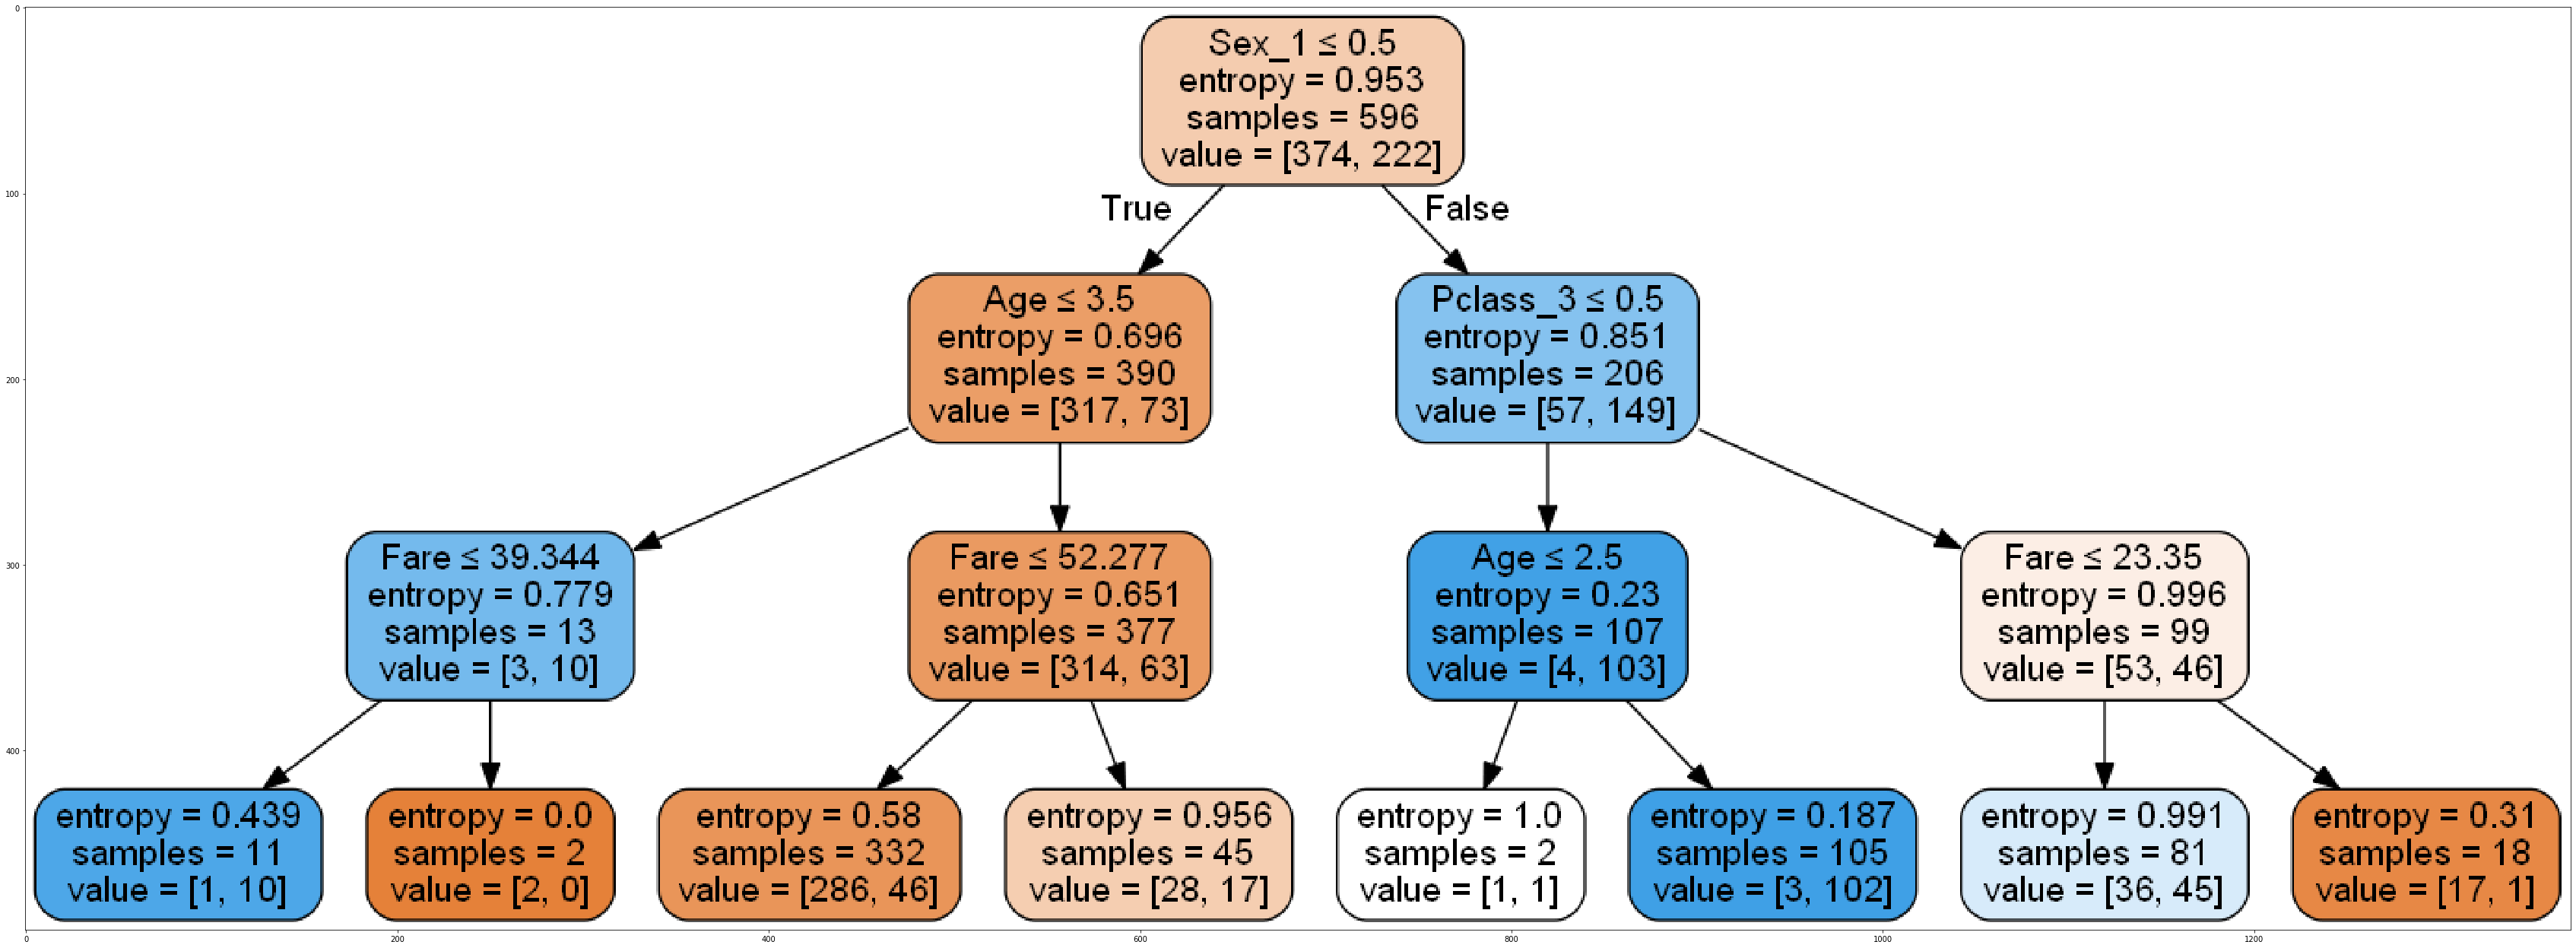

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize = (60, 60))
plt.imshow(mpimg.imread('tree.png'))

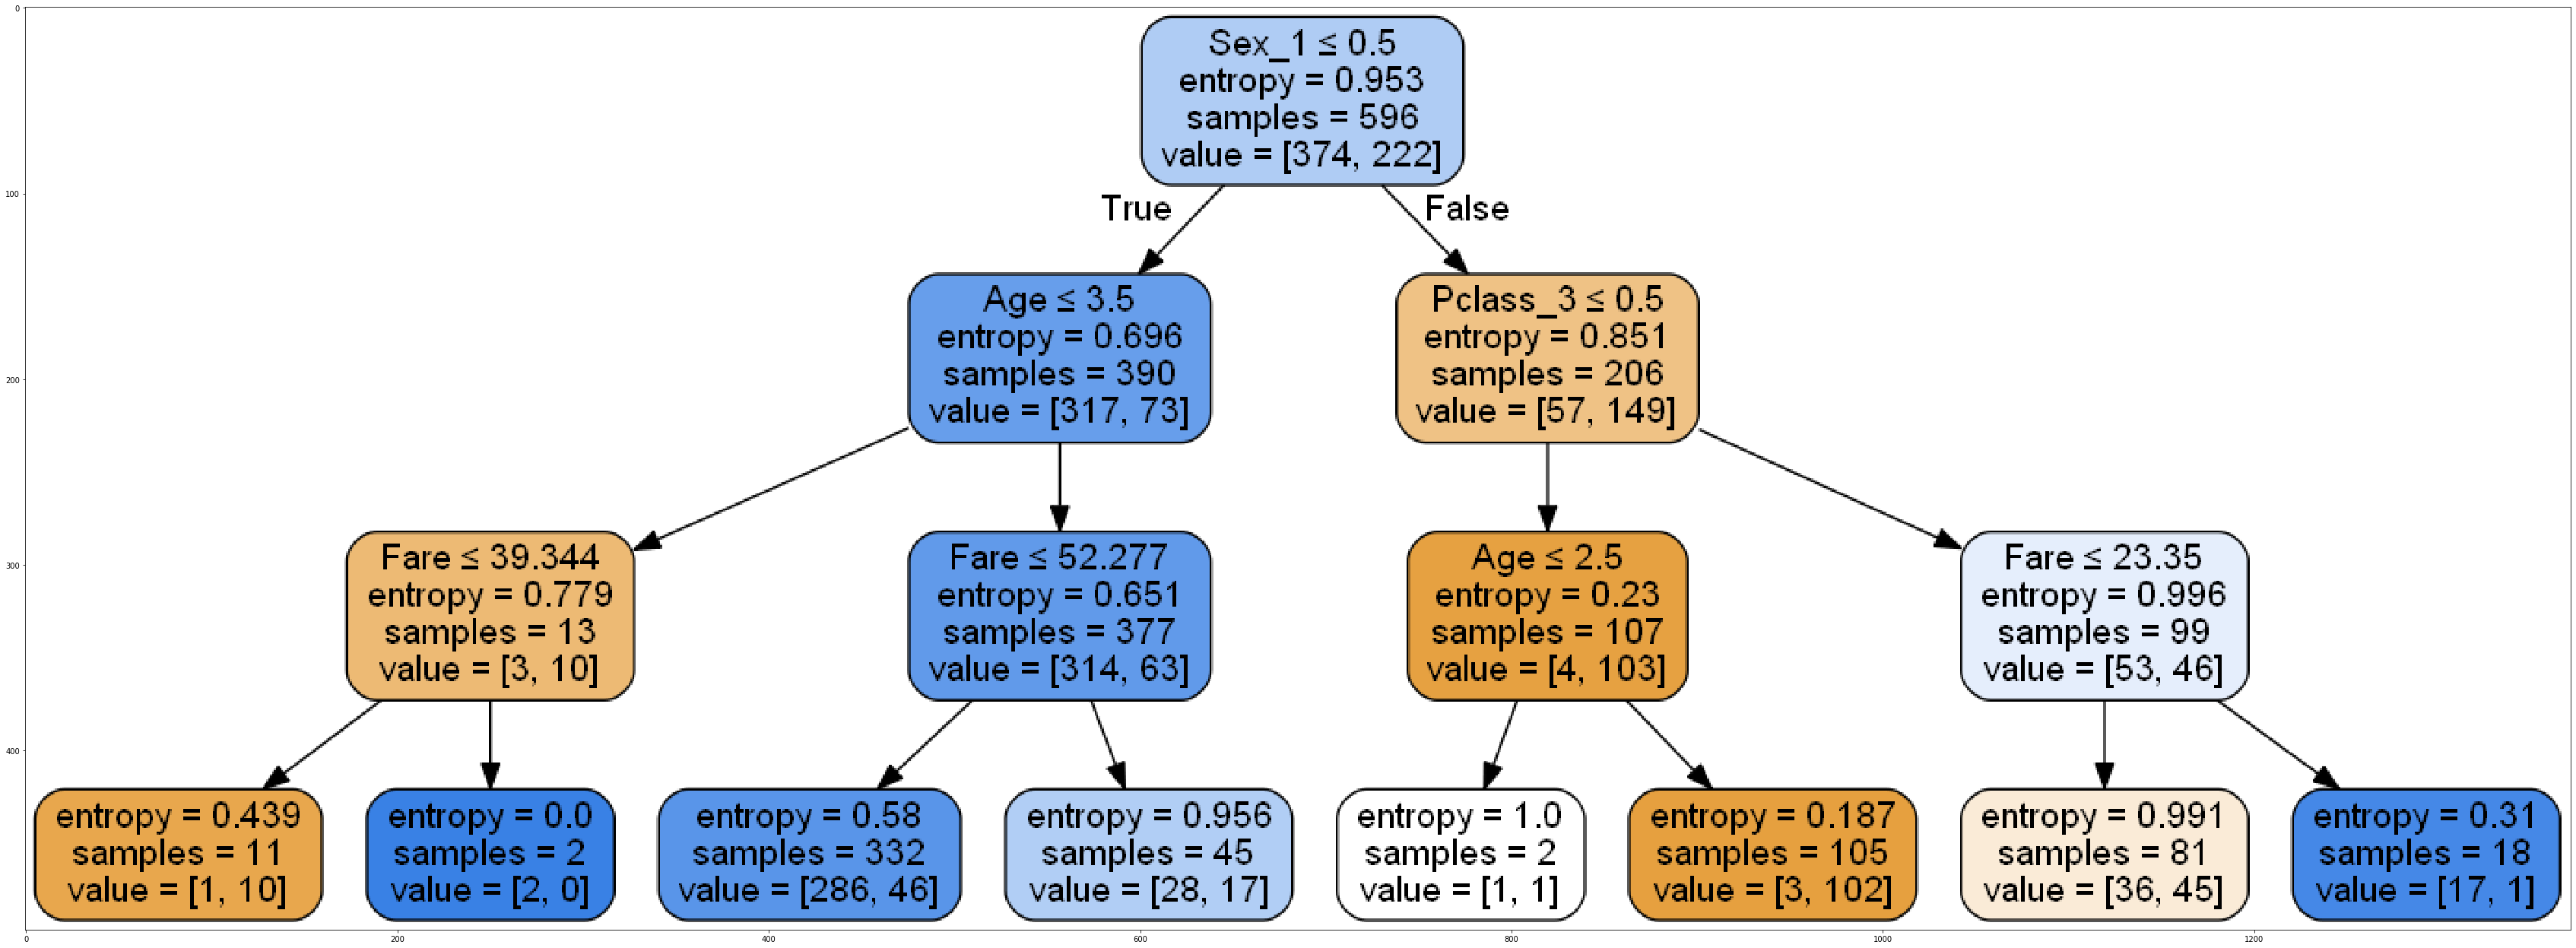

In [74]:
## Using cv2
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
##img = cv2.imread('decision.png')
img = cv2.imread('tree.png')
plt.figure(figsize = (60,60))
plt.imshow(img)

In [75]:
### Other way to visualise the tree

In [76]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [77]:
### https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2
dot_data = StringIO()

In [78]:
export_graphviz(my_tree, out_file=dot_data,  
                filled=True, rounded=True,feature_names=cols,
                special_characters=True)

In [79]:
## https://datascience.stackexchange.com/questions/37428/graphviz-not-working-when-imported-inside-pydotplus-graphvizs-executables-not
## https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2

import os

## Download Graphviz -- https://graphviz.gitlab.io/_pages/Download/Download_windows.html and unzip at system local drive
## and assign below path as I did "C:\E\Data_Science\ML_Software\graphviz\bin"

os.environ['PATH'] = os.environ['PATH']+';'+r"C:\E\Data_Science\ML_Software\graphviz\bin"

###  If you have permission to install Graphviz via conda or pip then install and assgn below path
##os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


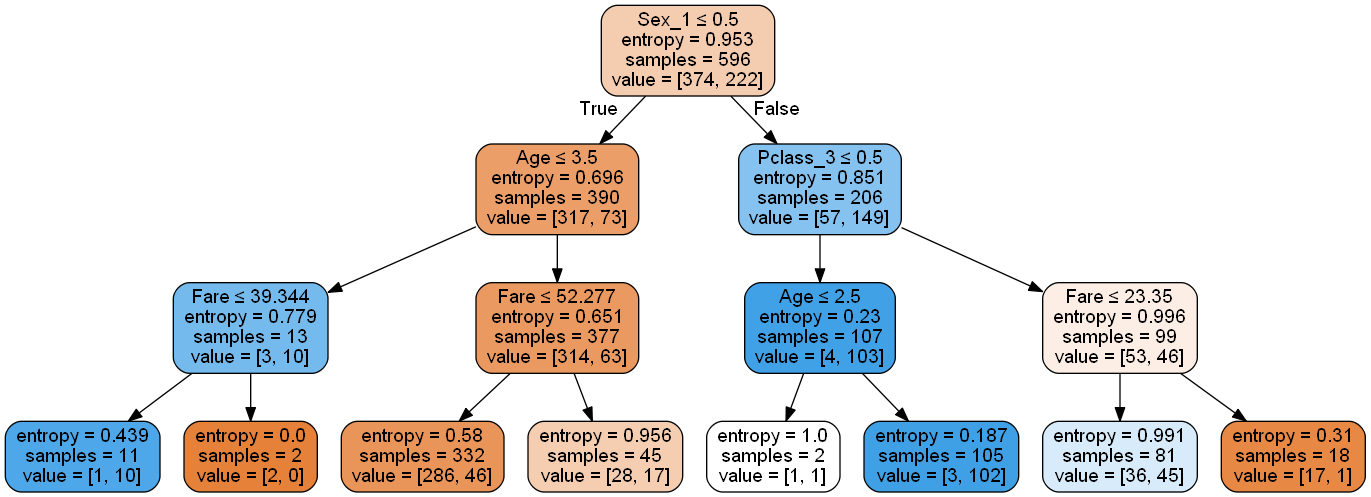

In [80]:
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [81]:
## Predict using y_train data
pred  = my_tree.predict(X_test)

In [82]:
np.unique(pred,return_counts= True)

(array([0., 1.]), array([193, 102], dtype=int64))

In [83]:
print(my_tree.score(X_test,y_test))

0.8169491525423729


In [84]:
## Print confustion metrics
conf_metric = metrics.confusion_matrix(y_test,pred)

In [85]:
conf_metric

array([[157,  18],
       [ 36,  84]], dtype=int64)

In [86]:
from mlxtend.plotting import plot_confusion_matrix

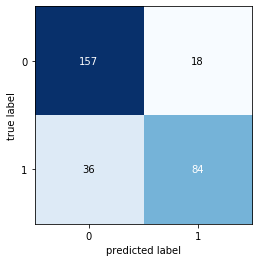

In [87]:
## Display conf_met
fig,ax = plot_confusion_matrix(conf_mat= conf_metric)

In [88]:
## Measure performance metrics
log_accuracy = metrics.accuracy_score(y_test,pred)
print("Accuracy Score : ", log_accuracy)
classification = metrics.classification_report(y_test,pred)
print(classification)
roc_auc_score = metrics.roc_auc_score(y_test,pred)
print("roc_auc_score : ",roc_auc_score)

Accuracy Score :  0.8169491525423729
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       175
         1.0       0.82      0.70      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.81       295

roc_auc_score :  0.7985714285714286


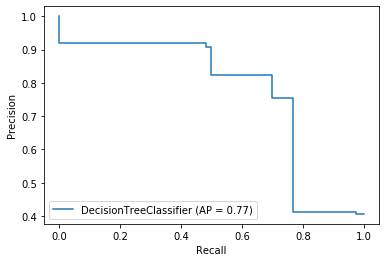

In [89]:
## Plot the precision_recall_curve graph
metrics.plot_precision_recall_curve(my_tree,X_test,y_test)

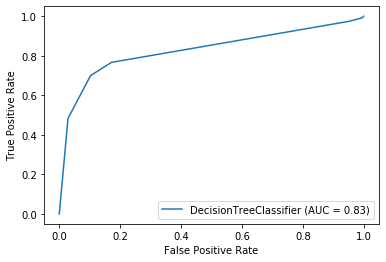

In [90]:
## Plot the ROC AUR graph
metrics.plot_roc_curve(my_tree,X_test,y_test)

In [91]:
## Lets check the impact of multicollinearity due to Onehot encoding
X_train

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
6,54.0,51.8625,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
718,25.0,15.5000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
685,25.0,41.5792,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
73,26.0,14.4542,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
882,22.0,10.5167,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
106,21.0,7.6500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
270,42.0,31.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
860,41.0,14.1083,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
435,14.0,120.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [92]:
X_train_new1 = X_train.drop(["Pclass_1","Sex_1","Embarked_1"],axis = 1)

In [93]:
X_train_new1

,Age,Fare,Pclass_2,Pclass_3,Sex_2,Embarked_2,Embarked_3
6,54.0,51.8625,0.0,0.0,1.0,0.0,1.0
718,25.0,15.5000,0.0,1.0,1.0,1.0,0.0
685,25.0,41.5792,1.0,0.0,1.0,0.0,0.0
73,26.0,14.4542,0.0,1.0,1.0,0.0,0.0
882,22.0,10.5167,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
106,21.0,7.6500,0.0,1.0,0.0,0.0,1.0
270,42.0,31.0000,0.0,0.0,1.0,0.0,1.0
860,41.0,14.1083,0.0,1.0,1.0,0.0,1.0
435,14.0,120.0000,0.0,0.0,0.0,0.0,1.0


In [94]:
X_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
709,25.0,15.2458,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
439,31.0,10.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
840,20.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
720,6.0,33.0000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
39,14.0,11.2417,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
715,19.0,7.6500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
525,40.5,7.7500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381,1.0,15.7417,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
140,22.0,15.2458,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [95]:
X_test_new1 = X_test.drop(["Pclass_1","Sex_1","Embarked_1"],axis = 1)

In [96]:
X_test_new1

,Age,Fare,Pclass_2,Pclass_3,Sex_2,Embarked_2,Embarked_3
709,25.0,15.2458,0.0,1.0,1.0,0.0,0.0
439,31.0,10.5000,1.0,0.0,1.0,0.0,1.0
840,20.0,7.9250,0.0,1.0,1.0,0.0,1.0
720,6.0,33.0000,1.0,0.0,0.0,0.0,1.0
39,14.0,11.2417,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
715,19.0,7.6500,0.0,1.0,1.0,0.0,1.0
525,40.5,7.7500,0.0,1.0,1.0,1.0,0.0
381,1.0,15.7417,0.0,1.0,0.0,0.0,0.0
140,22.0,15.2458,0.0,1.0,0.0,0.0,0.0


In [97]:
my_tree1 = tree.DecisionTreeClassifier(criterion="entropy",max_depth= 3) 
# #max_depth is maximum number of levels in the tree

my_tree1 = my_tree1.fit(X_train_new1,y_train)

In [98]:
my_tree1.score(X_test_new1,y_test)

0.8169491525423729

In [99]:
### We can see there is no any major impact due to Onehot encoding which have multicollinearity 
## we had deleted the collinear columns but score is same .

#### Lets see how our model is performing with titanic_test data

In [100]:
X_test_1 = df_test[list(cols)]
X_test_1.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
0,34.5,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,47.0,7.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,62.0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,27.0,8.6625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,22.0,12.2875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [101]:
X_test_1.shape

(418, 10)

In [102]:
pred_test = my_tree.predict(X_test_1)
pred_test.shape

(418,)

In [103]:
np.unique(pred_test,return_counts= True) ### Using actual test data-- titanic_test

(array([0., 1.]), array([270, 148], dtype=int64))

In [104]:
### Percentahe survived
print("Survived Percentage :", 148/418*100)

Survived Percentage : 35.406698564593306


In [105]:
np.unique(pred,return_counts= True)  ## using training Data-- titanic_train

(array([0., 1.]), array([193, 102], dtype=int64))

In [106]:
### Percentahe survived
print("Survived Percentage :", (102/(193+102)*100))

Survived Percentage : 34.57627118644068


We can see that our model is showing almost same percentage of survival on total train and test samples.

One of the main draw back of Decision Tree is that some times they may suffer from over fitting. So main challange with the
over fitting is that model perform good with train data but dont perform good with test new data.
Random Forest over come this issue. It fit data in such a way that it neither overfot nor underfit.
When we have over fitting it means that we have higher variance in the predicted output.

# Random Forest

Ensemble models are a great tool to fix the variance-bias trade-off which a typical machine learning model faces, i.e. when you try to lower bias, variance will go higher and vice-versa. This generally results in higher error rates.

Total Error in Model = Bias + Variance + Random Noise

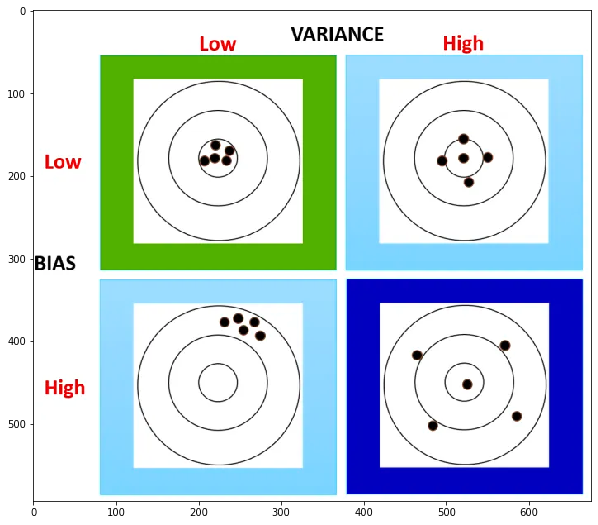

In [107]:
## Using cv2
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('variance.png')
plt.figure(figsize = (10,10))
plt.imshow(img)

Ensemble models typically combine several weak learners to build a stronger model, which will reduce variance and bias at the same time.

Ensemble models can be broken down into the following three main categories-

    Bagging
    Boosting
    Stacking

Bagging-

    One good example of such model is Random Forest
    These types of ensemble models work on reducing the variance by removing instability in the underlying complex models
    Each learner is asked to do the classification or regression independently and in parallel and then either a voting or averaging of the output of all the learners is done to create the final output
    Since these ensemble models are predominantly focuses on reducing the variance, the underlying models are fairly complex ( such as Decision Tree or Neural Network) to begin with low bias
    An underlying decision tree will have higher depth and many branches. In other words, the tree will be deep and dense and with lower bias


In [108]:
## Lets apply the  randon forest classifier
## Lets buliding and fitting the model
forest = RandomForestClassifier(n_estimators= 100,min_samples_split= 2, max_depth= 10,random_state= 1)
## estimators -- The number of trees in the forest
my_forest = forest.fit(X_train,y_train)

In [109]:
my_forest.score(X_test,y_test)

0.8033898305084746

In [110]:
pred_test_1 = my_forest.predict(X_test)

In [111]:
conf_metric_1 = metrics.confusion_matrix(y_test,pred_test_1)
conf_metric_1

array([[151,  24],
       [ 34,  86]], dtype=int64)

In [112]:
## Measure performance metrics
log_accuracy = metrics.accuracy_score(y_test,pred_test_1)
print("Accuracy Score : ", log_accuracy)
classification = metrics.classification_report(y_test,pred_test_1)
print(classification)
roc_auc_score = metrics.roc_auc_score(y_test,pred_test_1)
print("roc_auc_score : ",roc_auc_score)

Accuracy Score :  0.8033898305084746
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       175
         1.0       0.78      0.72      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295

roc_auc_score :  0.7897619047619049


In [113]:
X_train

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
6,54.0,51.8625,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
718,25.0,15.5000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
685,25.0,41.5792,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
73,26.0,14.4542,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
882,22.0,10.5167,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
106,21.0,7.6500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
270,42.0,31.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
860,41.0,14.1083,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
435,14.0,120.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [114]:
X_train_new = X_train.drop(["Pclass_1","Sex_1","Embarked_1"],axis = 1)

In [115]:
X_train_new

,Age,Fare,Pclass_2,Pclass_3,Sex_2,Embarked_2,Embarked_3
6,54.0,51.8625,0.0,0.0,1.0,0.0,1.0
718,25.0,15.5000,0.0,1.0,1.0,1.0,0.0
685,25.0,41.5792,1.0,0.0,1.0,0.0,0.0
73,26.0,14.4542,0.0,1.0,1.0,0.0,0.0
882,22.0,10.5167,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
106,21.0,7.6500,0.0,1.0,0.0,0.0,1.0
270,42.0,31.0000,0.0,0.0,1.0,0.0,1.0
860,41.0,14.1083,0.0,1.0,1.0,0.0,1.0
435,14.0,120.0000,0.0,0.0,0.0,0.0,1.0


In [116]:
X_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
709,25.0,15.2458,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
439,31.0,10.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
840,20.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
720,6.0,33.0000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
39,14.0,11.2417,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
715,19.0,7.6500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
525,40.5,7.7500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381,1.0,15.7417,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
140,22.0,15.2458,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [117]:
X_test_new = X_test.drop(["Pclass_1","Sex_1","Embarked_1"],axis = 1)

In [118]:
X_test_new

,Age,Fare,Pclass_2,Pclass_3,Sex_2,Embarked_2,Embarked_3
709,25.0,15.2458,0.0,1.0,1.0,0.0,0.0
439,31.0,10.5000,1.0,0.0,1.0,0.0,1.0
840,20.0,7.9250,0.0,1.0,1.0,0.0,1.0
720,6.0,33.0000,1.0,0.0,0.0,0.0,1.0
39,14.0,11.2417,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
715,19.0,7.6500,0.0,1.0,1.0,0.0,1.0
525,40.5,7.7500,0.0,1.0,1.0,1.0,0.0
381,1.0,15.7417,0.0,1.0,0.0,0.0,0.0
140,22.0,15.2458,0.0,1.0,0.0,0.0,0.0


In [119]:
## Lets apply the  randon forest classifier
## Lets buliding and fitting the model
forest1 = RandomForestClassifier(n_estimators= 100,min_samples_split= 2, max_depth= 10,random_state= 1)
## estimators -- The number of trees in the forest
my_forest1 = forest1.fit(X_train_new,y_train)

In [120]:
my_forest1.score(X_test_new,y_test)

0.8033898305084746

In [128]:
my_forest1.score(X_train_new,y_train)

0.9546979865771812

In [121]:
### We can see there is no any major impact due to Onehot encoding which have multicollinearity 
## we had deleted the collinear columns but score is same .

In [122]:
my_forest1.feature_importances_

array([0.26884753, 0.29498209, 0.01656757, 0.07938254, 0.29492767,
       0.01267195, 0.03262066])

In [124]:
columns = X_test_new.columns.to_list()
columns

['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_2', 'Embarked_2', 'Embarked_3']

In [127]:
list(zip(columns,my_forest1.feature_importances_))

[('Age', 0.2688475305696571),
 ('Fare', 0.29498209320937047),
 ('Pclass_2', 0.01656756615153701),
 ('Pclass_3', 0.07938253951955275),
 ('Sex_2', 0.294927666225029),
 ('Embarked_2', 0.012671945967359327),
 ('Embarked_3', 0.03262065835749441)]

### Applying Grid search cv for Parameter Tuning of Random Forest

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
forest2 = RandomForestClassifier(max_features="auto",)

In [133]:
parameter_grid = {"criterion": ["gini","entropy"],"min_samples_leaf" : [1,5,10],"min_samples_split": [2,4,10,12],"n_estimators": [50,100,400,700]}

In [134]:
gs = GridSearchCV(estimator=forest2,param_grid=parameter_grid,scoring="accuracy",cv = 5,n_jobs=-1)

In [135]:
gs = gs.fit(X_train_new,y_train)

In [138]:
print(gs.best_score_)
print(gs.best_params_)

0.8271988795518208
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 400}


In [142]:
print(gs.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [144]:
## find index of best fit model
gs.best_index_

14

In [143]:
## Display all cross validation results
cv = pd.DataFrame(gs.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.274936,0.007653,0.015622,4.672031e-07,gini,1,2,50,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.800000,0.773109,0.764706,0.764706,0.823529,0.785210,0.023127,96
1,0.543623,0.011691,0.034367,6.248236e-03,gini,1,2,100,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.800000,0.789916,0.781513,0.781513,0.815126,0.793613,0.012729,95
2,2.133874,0.027237,0.128094,6.248522e-03,gini,1,2,400,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.800000,0.806723,0.773109,0.764706,0.857143,0.800336,0.032492,89
3,3.752244,0.028634,0.240568,1.249723e-02,gini,1,2,700,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.800000,0.806723,0.764706,0.781513,0.857143,0.802017,0.031233,85
4,0.265562,0.009880,0.018746,6.248426e-03,gini,1,4,50,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.800000,0.840336,0.781513,0.789916,0.840336,0.810420,0.025118,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,3.683510,0.041212,0.218698,9.880007e-03,entropy,10,10,700,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.775000,0.848739,0.806723,0.731092,0.857143,0.803739,0.046881,71
92,0.259314,0.007653,0.015621,3.814697e-07,entropy,10,12,50,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.791667,0.865546,0.798319,0.731092,0.857143,0.808754,0.048988,56
93,0.549872,0.018217,0.040616,7.652398e-03,entropy,10,12,100,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.791667,0.865546,0.806723,0.722689,0.848739,0.807073,0.050027,60
94,2.077637,0.049399,0.124971,2.613936e-02,entropy,10,12,400,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.783333,0.840336,0.789916,0.731092,0.840336,0.797003,0.040833,92
